In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor, RidgeCV, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# 1.获取数据
data_x, data_y = fetch_openml(name="boston", version=1, as_frame=True, return_X_y=True, parser="pandas")

In [24]:
def linear_model1(model):
    # 2.数据集划分
    x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, random_state=22)

    # 3.特征工程-标准化
    transfer = StandardScaler()
    x_train = transfer.fit_transform(x_train)
    x_test = transfer.fit_transform(x_test)

    
    # 4.机器学习-线性回归(正规方程)
    estimator = None
    if model == 'LR':
        estimator = LinearRegression()
    elif model == 'RIDGE':
        estimator = Ridge(alpha=1)  
    else:
        estimator = SGDRegressor(max_iter=1000)
    
    estimator.fit(x_train, y_train)
    # 5.模型评估
    # 5.1 获取系数等值
    y_predict = estimator.predict(x_test)
    print("预测值为:\n", y_predict)
    print("模型中的系数为:\n", estimator.coef_)
    print("模型中的偏置为:\n", estimator.intercept_)
    

    # 5.2 评价
    # 均方误差
    error = mean_squared_error(y_test, y_predict)
    print("误差为:\n", error)

    return None

预测值为:
 [28.14790667 31.30481159 20.5173895  31.4803076  19.01576648 18.26058425
 20.57439825 18.45232382 18.46065155 32.93661269 20.3603692  27.24886071
 14.81691426 19.20872297 37.01503458 18.32036009  7.71389628 17.56196944
 30.18543811 23.60655873 18.14917545 33.84385342 28.48976083 16.9967041
 34.76065063 26.22246312 34.83857168 26.62310118 18.64402278 13.21154037
 30.37364532 14.70785748 37.18173708  8.88049446 15.06699441 16.14502168
  7.19990762 19.17049423 39.56848262 28.23663    24.62411509 16.75182833
 37.84465582  5.71770376 21.21547924 24.63882018 18.8561516  19.93416672
 15.19839712 26.29892968  7.4274177  27.14300763 29.18745146 16.27895854
  7.99799673 35.46394958 32.38905222 20.83161049 16.41464618 20.87141783
 22.92150844 23.60828508 19.32245804 38.33751529 23.87463642 18.98494066
 12.63480997  6.12915396 41.44675745 21.08894595 16.27561572 21.48546861
 40.74502107 20.4839158  36.82098808 27.0452329  19.79437176 19.64484428
 24.58763105 21.08454269 30.91968983 19.33266

ValueError: Could not interpret value `data_x` for parameter `x`

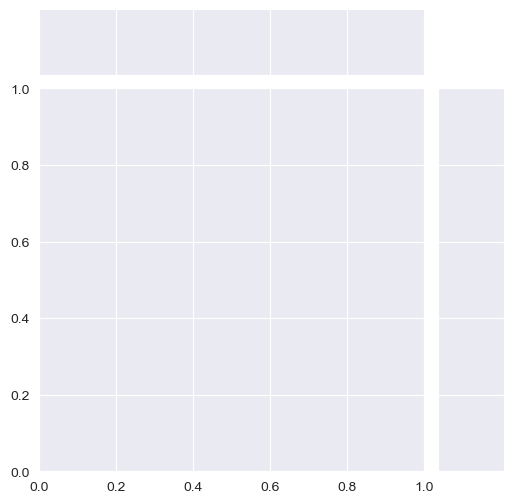

In [21]:
linear_model1('LR')

In [11]:
linear_model1('SGD')

预测值为:
 [28.15217072 31.41621861 20.81947026 31.34062615 19.18506599 18.14689963
 20.81986908 18.32843845 18.5385364  32.80655212 20.71769553 26.95263523
 14.80182675 19.26374955 37.00564    18.24286752  7.89361024 17.66310787
 30.27761064 23.63568601 18.01534538 33.8083216  28.04584845 16.79555513
 34.6754061  26.23691501 34.58436592 26.6430156  18.50247899 13.9546259
 30.34580503 13.47400549 37.52019441  9.26513323 15.19791224 15.80277354
  7.19827829 18.91446453 39.36471537 28.46741841 24.64099886 16.7041432
 37.93983415  5.47277639 20.95530802 24.46310502 18.98830786 19.99833379
 14.88466252 26.23291421  8.37257446 26.8970617  29.07884772 16.19369976
  8.03103696 35.40018537 31.79531601 21.84713327 16.41880944 20.72162693
 23.06283831 23.50583124 19.50760225 38.06676905 24.89564383 18.78897226
 12.68038527  5.92492286 41.50641311 21.06952426 16.06602377 21.49475007
 40.82308383 20.83349195 36.80597457 27.01384715 20.56822088 19.98903386
 24.60844762 22.45733272 31.24549536 19.237929

In [27]:
linear_model1('RIDGE')

预测值为:
 [28.2471262  31.40097886 20.8194229  31.40365477 19.31019999 18.26254636
 20.81277975 18.41321643 18.60178372 32.86507563 20.6870883  26.92488984
 14.83561216 19.36204395 37.14718402 18.09904956  8.0942745  17.73799811
 30.38681591 23.60315917 18.10781437 33.84188118 28.14524051 16.71966735
 34.67305295 26.13210334 34.40313406 26.62653357 18.50999316 14.14384171
 30.34414823 13.33478518 37.41605126  9.17603586 15.25345879 15.67426617
  7.16466291 18.90522926 39.44577755 28.61603162 24.68933096 16.77753215
 38.28825976  5.36978551 20.90828698 24.39009316 19.32007219 20.12145569
 14.86280667 26.30797631  8.4178076  26.80383882 29.18283431 16.18420035
  7.93481595 35.42242943 31.51140306 21.95420929 16.4417275  20.7884633
 23.00167051 23.44374921 19.62414813 38.0362995  24.97731222 18.81701092
 12.67897031  5.83249584 41.78883452 21.01303787 15.77131195 21.671297
 40.95449405 20.84068768 36.86522822 26.99769839 20.75792839 19.84591919
 24.63439646 22.73980637 31.28676061 19.1833376